In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-gmm-dataset/sample_submission.csv
/kaggle/input/tabular-playground-gmm-dataset/submission.csv
/kaggle/input/tabular-playground-gmm-dataset/data.csv
/kaggle/input/tabular-playground-gmm-dataset/bic.csv
/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/data.csv')

In [3]:
dataset = dataset.set_index('id')
dataset.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22  f_2

In [5]:
dataset.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[dataset.columns] = scaler.fit_transform(dataset[dataset.columns])
dataset.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,-0.960479,1.502035,0.983395,...,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,-0.960479,-0.906254,-0.371415,...,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,-0.147872,1.020377,-0.540766,...,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,0.122997,-1.147082,0.814044,...,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,0.664735,0.057062,-0.540766,...,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


In [7]:
from sklearn.mixture import GaussianMixture

In [8]:
# finding the BIC (Bayesian Information Criterion) for various choices of n_components. This takes a while to run so the results are saved in bic.csv
#bic = []
#for i in range(2, 15):
#    gm = GaussianMixture(n_components = i, covariance_type='full', tol=1e-4,
#                         max_iter=500,init_params='k-means++', random_state=42, verbose=1)
#    gm.fit(dataset)
#    bic.append([i,gm.bic(dataset)])
#bic = np.array(bic)
#pd.DataFrame({'n_components':bic[:,0], 'bic':bic[:,1]}).to_csv("bic.csv", header=True,index=False)

In [9]:
bic = np.array(pd.read_csv('/kaggle/input/tabular-playground-gmm-dataset/bic.csv'))

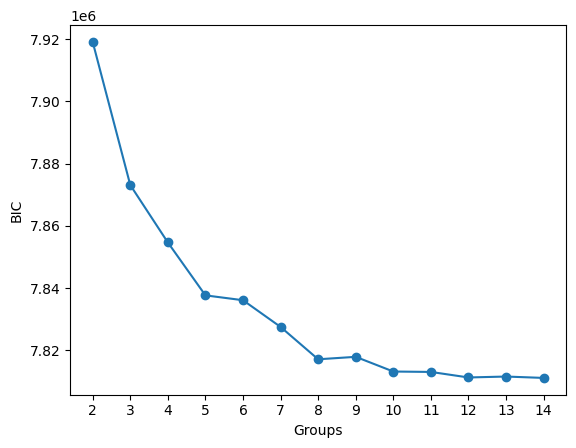

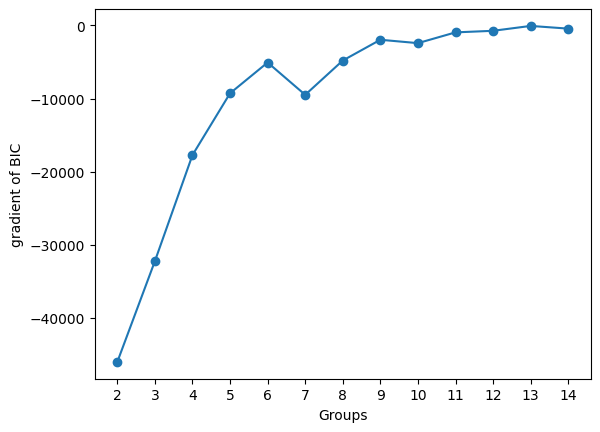

In [10]:
import matplotlib.pyplot as plt
plt.plot(bic[:,0], bic[:,1], marker='o')
plt.xlabel("Groups")
plt.ylabel("BIC")
plt.xticks(range(2,15))
plt.show()
plt.plot(bic[:,0], np.gradient(bic[:,1]), marker='o')
plt.xlabel("Groups")
plt.ylabel("gradient of BIC")
plt.xticks(range(2,15))
plt.show()

the BIC shows an elbow behavior at 5 groups.

In [11]:
gm = GaussianMixture(n_components = 5, covariance_type='full', tol=1e-4,
                         max_iter=500,init_params='k-means++', random_state=42)

In [12]:
gm.fit(dataset)

GaussianMixture(init_params='k-means++', max_iter=500, n_components=5,
                random_state=42, tol=0.0001)

In [13]:
segments = gm.predict(dataset)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca_components = PCA(n_components = 2, copy=True).fit_transform(dataset)

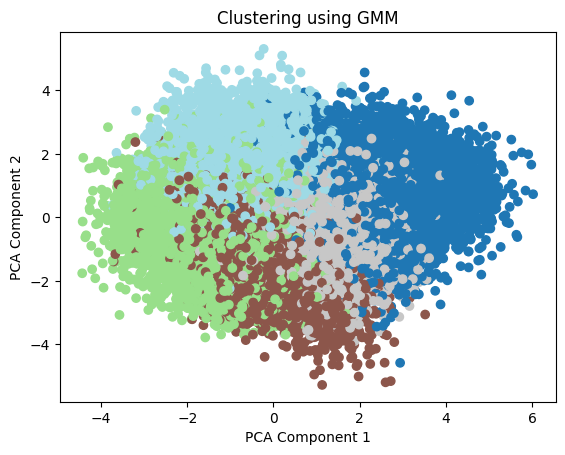

In [16]:
plt.scatter(pca_components[:,0], pca_components[:,1], c=segments, cmap='tab20')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clustering using GMM")
plt.show()

In [17]:
dataset_modified = dataset.copy()

In [18]:
dataset_modified['Predicted'] = segments

In [19]:
dataset_modified[['Predicted']].to_csv("submission.csv", header=True,index=True)

In [20]:
# public score of 0.41548 Note that as per the rules of this now-closed competition, 

# "Submissions are evaluated on the Adjusted Rand Index between the ground truth cluster labels of the data and your predicted cluster labels. 
#  You are not given the number of ground truth clusters or any training labels. This is a completely unsupervised problem"